In [14]:
import numpy as np #importa a biblioteca numpy
from sklearn.model_selection import train_test_split #importa biblioteca de testes
from sklearn.tree import DecisionTreeClassifier #importa a arvore de decisão
from sklearn import tree #importa a função tree para plotar a arvore
from sklearn.metrics import accuracy_score #métrica de ácuracia do algoritimo
from sklearn.metrics import confusion_matrix # importa matiz de confusão
from sklearn.tree import plot_tree
import pandas as pd #importa a biblioteca pandas
import matplotlib.pyplot as plt # importa a matplotlib
import seaborn as sns # importa a seaborn

In [15]:
#criando a base de dados
data = pd.DataFrame({
    'Velocidade de Operação': [10,5,8,6,12,4],
    'Complexidade da Tarefa': ['Baixa', 'Alta', 'Média', 'Alta', 'Baixa', 'Alta'],
    'Manutenção Necessaria': ['Baixa', 'Alta', 'Média', 'Alta', 'Baixa', 'Média'],
    'Classificação': ['Montagem', 'Teste', 'Montagem', 'Teste', 'Montagem', 'Teste']
})

In [16]:
# Codificando variáveis categóricas em formato numérico
data_encoded = pd.get_dummies(data, columns=['Complexidade da Tarefa', 'Manutenção Necessaria'])

In [17]:
# Definindo características (features) e alvo (target)
x = data_encoded.drop('Classificação', axis=1)  # Remove a coluna 'Classificação' e usa o restante como features
y = data['Classificação']  # Define a coluna 'Classificação' como o alvo

In [18]:
# Dividindo os dados em conjunto de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Inicializando e treinando o modelo
model = DecisionTreeClassifier()  # Cria uma instância do classificador de árvore de decisão
model.fit(x_treino, y_treino)  # Treina o modelo com os dados de treino

DecisionTreeClassifier()

In [20]:
# Fazendo previsões e avaliando o modelo
prev = model.predict(x_teste)  # Faz previsões com o conjunto de teste
accuracy = accuracy_score(y_teste, prev)  # Calcula a acurácia das previsões
matrix = confusion_matrix(y_teste, prev)  # Calcula a matriz de confusão


print(f'Acurácia: {accuracy:.2f}')  # Exibe a acurácia
print('Matriz de Confusão:')
print(matrix)  # Exibe a matriz de confusão

Acurácia: 1.00
Matriz de Confusão:
[[1 0]
 [0 1]]


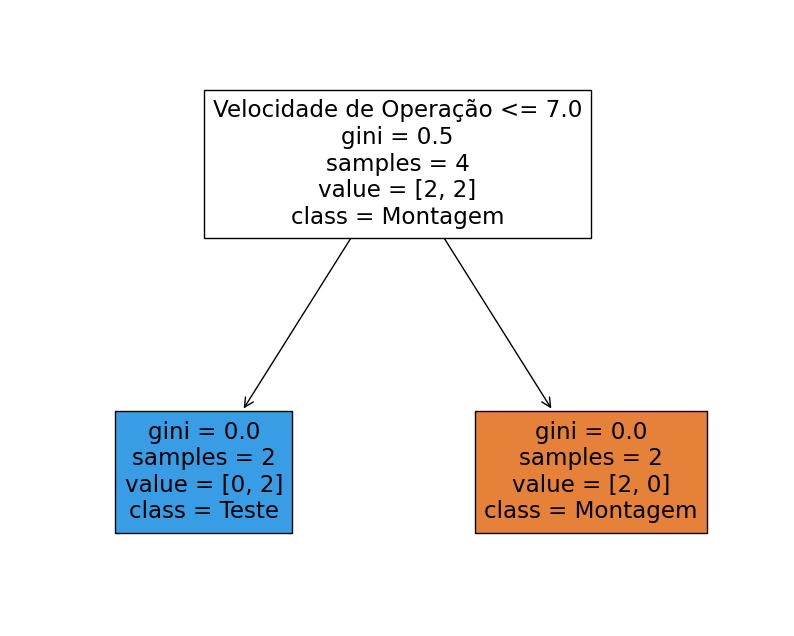

In [23]:
# Plotando a árvore de decisão
fig = plt.figure(figsize=(10, 8))  # Define o tamanho da figura
plot_tree(model, 
          feature_names=x.columns.tolist(),  # Converte Index para lista
          class_names=model.classes_.tolist(),  # Converte classes para lista
          filled=True)  # Preenche os nós com cores
plt.show()  # Exibe o gráfico
